In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('default')

In [3]:
from f1_db_queries import (
    connect_to_db, run_query, run_query_generic,
    run_query_results, run_query_qualifying, run_query_max_points,
    COND_FASTEST_LAPS, COND_RACE_WINNERS, COND_POLE_POSITION,
    get_constructors_info, get_drivers_info, get_champions,
    get_wins_per_team_per_year
)
from f1_graphs import (
    parse_dataframe, TEAM_COLORS, plot_team_colors,
    plot_results_year_round_team_color,
    plot_num_unique_winners_per_year, plot_wins_per_year,
    plot_driver_and_team_colors
)

In [4]:
graphs_folder = 'images'

DB from http://ergast.com/mrd/

In [5]:
db_conn = connect_to_db()

In [6]:
constructors_df = get_constructors_info(db_conn)
with open('constructors.md', 'w') as f:
    constructors_df.to_markdown(f)
    
drivers_df = get_drivers_info(db_conn)
with open('drivers.md', 'w') as f:
    drivers_df.to_markdown(f)
    
champions_df = get_champions(db_conn)

In [7]:
no_colors = plot_team_colors(constructors_df)
print(no_colors)

plt.savefig(graphs_folder + '\\team_colors.png', dpi=200)
plt.close()

['super_aguri', 'spyker', 'mf1', 'spyker_mf1', 'minardi', 'jaguar', 'prost', 'arrows', 'lola', 'forti', 'footwork', 'pacific', 'simtek', 'larrousse', 'dallara', 'fondmetal', 'moda', 'ags', 'lambo', 'leyton', 'coloni', 'eurobrun', 'osella', 'onyx', 'life', 'rial', 'zakspeed', 'ram', 'spirit', 'toleman', 'ats', 'theodore', 'fittipaldi', 'ensign', 'merzario', 'kauhsen', 'rebaque', 'surtees', 'martini', 'lec', 'mcguire', 'boro', 'apollon', 'kojima', 'parnelli', 'maki', 'hill', 'lyncar', 'trojan', 'amon', 'token', 'iso_marlboro', 'tecno', 'politoys', 'connew', 'bellasi', 'tomaso', 'lds', 'protos', 'shannon', 'scirocco', 're', 'brp', 'derrington', 'gilby', 'stebro', 'emeryson', 'enb', 'jbw', 'ferguson', 'mbm', 'behra-porsche', 'scarab', 'watson', 'epperly', 'phillips', 'lesovsky', 'trevis', 'meskowski', 'kurtis_kraft', 'kuzma', 'vhristensen', 'ewing', 'moore', 'dunn', 'elder', 'sutton', 'fry', 'tec-mec', 'connaught', 'alta', 'osca', 'gordini', 'stevens', 'bugatti', 'lancia', 'hwm', 'schroede

In [8]:
races_race_winners = run_query_results(db_conn, COND_RACE_WINNERS)

plot_driver_and_team_colors(races_race_winners, constructors_df)
plt.savefig(graphs_folder + '\\f1_driver_team_colors.png', dpi=200)
plt.close()

In [9]:
# Time between wins
team_year_wins = get_wins_per_team_per_year(db_conn)
for team in ['ferrari', 'mclaren', 'williams']:
    years = team_year_wins[(team_year_wins['constructorRef'] == team)]['year'].values
    if 2022 not in years:
        years = np.hstack([years, 2022])
    
    max_interval = np.diff(years)
    ind_max = np.argmax(np.diff(years))
    print(team, max_interval[ind_max], years[ind_max], years[ind_max+1])


ferrari 4 1990 1994
mclaren 9 2012 2021
williams 10 2012 2022


In [10]:
races_race_winners = run_query_results(db_conn, COND_RACE_WINNERS)
results_race_winners = parse_dataframe(races_race_winners, constructors_df, champions_df,
                                       show_championships=False)

plot_results_year_round_team_color(results_race_winners, constructors_df, drivers_df,
                                   result_type='Race Wins', win_type='win',
                                   show_drivers=False, min_team_wins=20)

plt.savefig(graphs_folder + '\\f1_race_wins_team_at_least_20.png', dpi=200)
plt.close()

In [11]:
races_race_winners = run_query_results(db_conn, COND_RACE_WINNERS)
results_race_winners = parse_dataframe(races_race_winners, constructors_df, champions_df,
                                       show_championships=True)

plot_results_year_round_team_color(results_race_winners, constructors_df, drivers_df,
                                   result_type='Race Wins', win_type='win',
                                   show_drivers=False, min_team_wins=0)

plt.savefig(graphs_folder + '\\f1_race_wins_team.png', dpi=200)
plt.close()

In [12]:
races_race_winners = run_query_results(db_conn, COND_RACE_WINNERS)
results_race_winners = parse_dataframe(races_race_winners, constructors_df, champions_df,
                                       show_championships=True)

plot_results_year_round_team_color(results_race_winners, constructors_df, drivers_df,
                                   result_type='Race Wins', win_type='win',
                                   show_drivers=True, show_teams=False, min_team_wins=0)

plt.savefig(graphs_folder + '\\f1_race_wins_drivers.png', dpi=200)
plt.close()

In [13]:
races_race_winners = run_query_results(db_conn, COND_RACE_WINNERS)
results_race_winners = parse_dataframe(races_race_winners, constructors_df, champions_df,
                                       show_championships=True)

plot_results_year_round_team_color(results_race_winners, constructors_df, drivers_df,
                                   result_type='Race Wins', win_type='win',
                                   show_drivers=True, min_team_wins=0)

plt.savefig(graphs_folder + '\\f1_race_wins_team_driver.png', dpi=200)
plt.close()

In [14]:
races_fastest_laps = run_query_results(db_conn, COND_FASTEST_LAPS)
results_fastest_laps = parse_dataframe(races_fastest_laps, constructors_df, champions_df)

plot_results_year_round_team_color(results_fastest_laps, constructors_df, drivers_df, result_type='Fastest Laps',
                                   show_drivers=False, min_team_wins=0)

plt.savefig(graphs_folder + '\\f1_fastest_laps_team.png', dpi=200)
plt.close()

In [15]:
races_fastest_laps = run_query_results(db_conn, COND_FASTEST_LAPS)
results_fastest_laps = parse_dataframe(races_fastest_laps, constructors_df, champions_df)

plot_results_year_round_team_color(results_fastest_laps, constructors_df, drivers_df, result_type='Fastest Laps',
                                   show_drivers=False, min_team_wins=0)

plt.savefig(graphs_folder + '\\f1_fastest_laps_team_and_driver.png', dpi=200)
plt.close()

In [16]:
races_pole = run_query_qualifying(db_conn, COND_POLE_POSITION)
results_pole = parse_dataframe(races_pole, constructors_df, champions_df)

plot_results_year_round_team_color(results_pole, constructors_df, drivers_df, result_type='Pole Positions',
                                   min_team_wins=0)

plt.savefig(graphs_folder + '\\f1_poles_team.png', dpi=200)
plt.close()

In [17]:
races_most_points = run_query_max_points(db_conn)
results_most_points = parse_dataframe(races_most_points, constructors_df, champions_df, show_championships=True)

plot_results_year_round_team_color(results_most_points, constructors_df, drivers_df, result_type='Top Point Scorers',
                                   min_team_wins=0)

plt.savefig(graphs_folder + '\\f1_most_points_team.png', dpi=200)
plt.close()

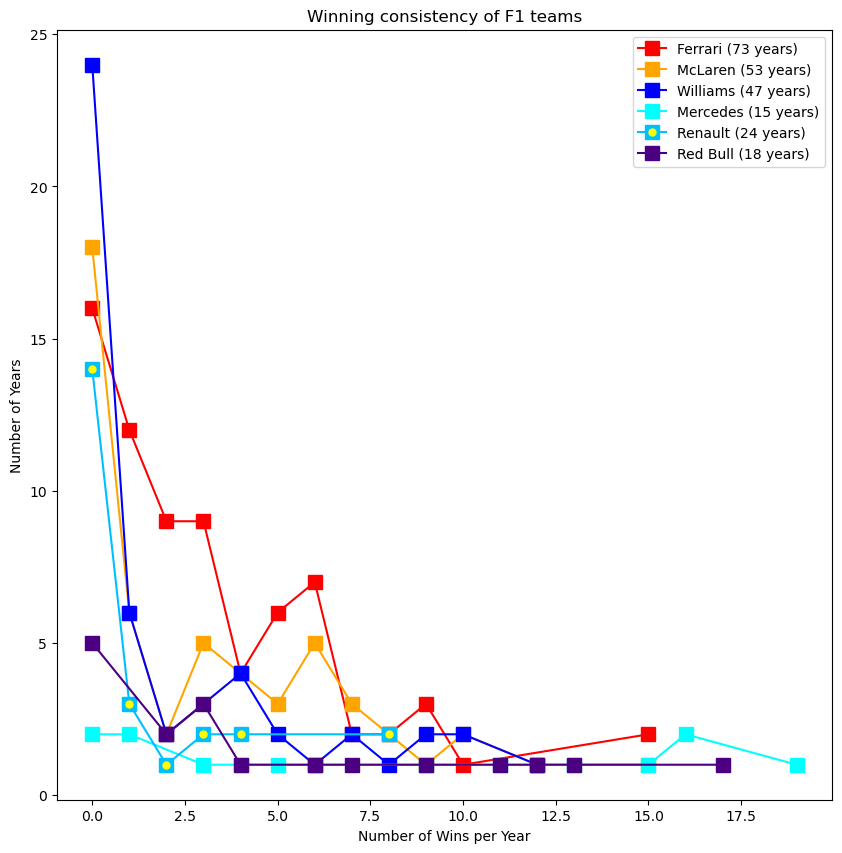

In [18]:
races_race_winners = run_query_results(db_conn, COND_RACE_WINNERS)
results_race_winners = parse_dataframe(races_race_winners, constructors_df, champions_df,
                                       show_championships=False)

plot_wins_per_year(results_race_winners['team'], constructors_df)

In [19]:
#db_conn.close()